### TIme Series Econometrics
Alexander Skorobogatov

# Topic 1. Dynamics in ts linear models

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Univariate time series
## AR(1)

In [57]:
# Cases: stable positive, stable negative, unit root positive, unit root negative, unstable positive, unstable negative

T = 100
coef = [0.9,-0.9,1,-1,1.1,-1.1]
mat = []
for i in range(len(coef)):
    a = np.eye(T) + np.eye(T,k=-1)*-coef[i]
    mat.append(a)

# Deterministic    
y = []
y2 = []
e = np.ones(T)
e2 = np.random.normal(0,0.001, size=(T,1))
for i in range(len(coef)):
    a = np.linalg.inv(mat[i])@e
    y.append(a)

# Stochastic
for i in range(len(coef)):
    a = np.linalg.inv(mat[i])@e2
    y2.append(a)
y

[array([1.        , 1.9       , 2.71      , 3.439     , 4.0951    ,
        4.68559   , 5.217031  , 5.6953279 , 6.12579511, 6.5132156 ,
        6.86189404, 7.17570464, 7.45813417, 7.71232075, 7.94108868,
        8.14697981, 8.33228183, 8.49905365, 8.64914828, 8.78423345,
        8.90581011, 9.0152291 , 9.11370619, 9.20233557, 9.28210201,
        9.35389181, 9.41850263, 9.47665237, 9.52898713, 9.57608842,
        9.61847958, 9.65663162, 9.69096846, 9.72187161, 9.74968445,
        9.774716  , 9.7972444 , 9.81751996, 9.83576797, 9.85219117,
        9.86697205, 9.88027485, 9.89224736, 9.90302263, 9.91272036,
        9.92144833, 9.9293035 , 9.93637315, 9.94273583, 9.94846225,
        9.95361602, 9.95825442, 9.96242898, 9.96618608, 9.96956747,
        9.97261073, 9.97534965, 9.97781469, 9.98003322, 9.9820299 ,
        9.98382691, 9.98544422, 9.98689979, 9.98820982, 9.98938883,
        9.99044995, 9.99140496, 9.99226446, 9.99303801, 9.99373421,
        9.99436079, 9.99492471, 9.99543224, 9.99

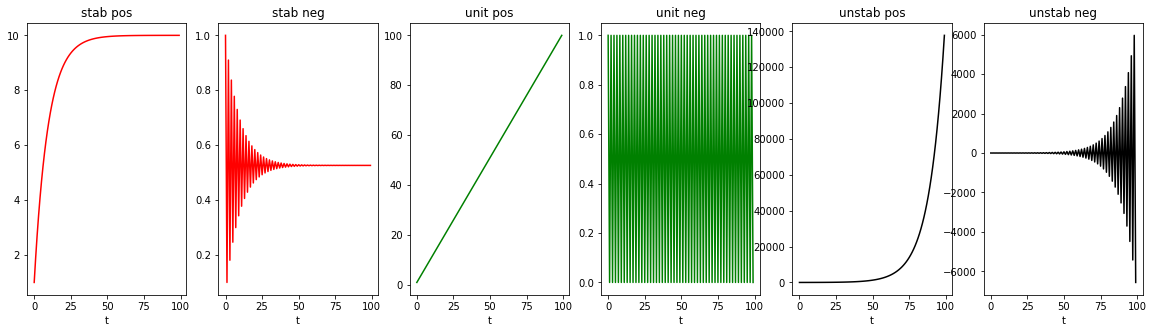

In [54]:
fig, axs = plt.subplots(1,6, figsize=(20, 5))

colors = ['red','red','green','green','black','black']
titles = ['stab pos', 'stab neg', 'unit pos', 'unit neg','unstab pos','unstab neg']

for i in range(len(coef)):
    a = y[i]
    axs[i].plot(a, c = colors[i])
    axs[i].set(xlabel='t', title=titles[i])     

plt.show()

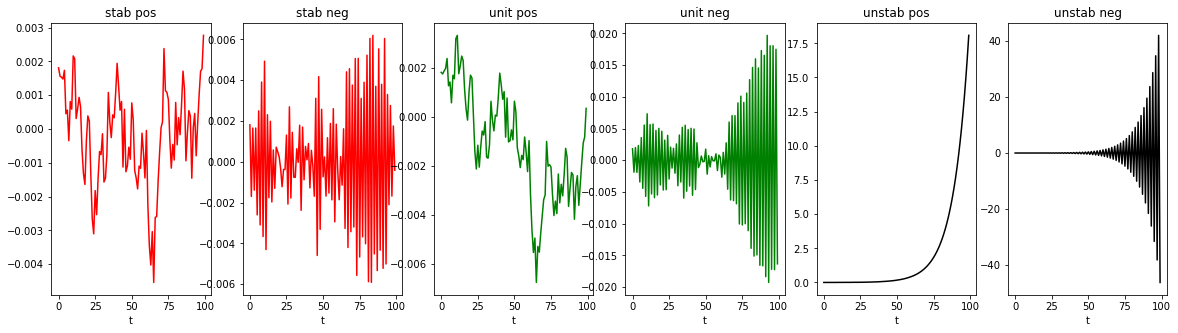

In [55]:
fig, axs = plt.subplots(1,6, figsize=(20, 5))

colors = ['red','red','green','green','black','black']
titles = ['stab pos', 'stab neg', 'unit pos', 'unit neg','unstab pos','unstab neg']

for i in range(len(coef)):
    a = y2[i]
    axs[i].plot(a, c = colors[i])
    axs[i].set(xlabel='t', title=titles[i])     

plt.show()

### With different coef values

In [67]:
# 3. Cases: stable positive, stable negative, unit root positive, unit root negative, unstable positive, unstable negative

T = 100
b1,b2,b3,b4,b5,b6 = 0.5,-0.5,1,-1,1.5,-1.5

A1 = np.eye(T) + np.eye(T,k=-1)*-b1
A2 = np.eye(T) + np.eye(T,k=-1)*-b2
A3 = np.eye(T) + np.eye(T,k=-1)*-b3
A4 = np.eye(T) + np.eye(T,k=-1)*-b4
A5 = np.eye(T) + np.eye(T,k=-1)*-b5
A6 = np.eye(T) + np.eye(T,k=-1)*-b6

e = np.random.normal(0,0.001, size=(T,1))
y1 = np.linalg.inv(A1)@e
y2 = np.linalg.inv(A2)@e
y3 = np.linalg.inv(A3)@e
y4 = np.linalg.inv(A4)@e
y5 = np.linalg.inv(A5)@e
y6 = np.linalg.inv(A6)@e

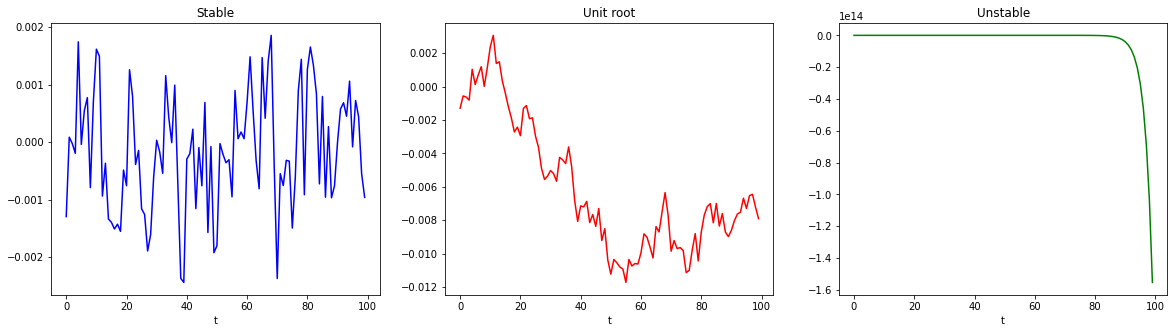

In [68]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))

colors = ['blue', 'red', 'green']
titles = ['Stable', 'Unit root', 'Unstable']

li =  [y1,y3,y5]
for i in range(len(li)):
    a = li[i]
    axs[i].plot(a, c=colors[i])
    axs[i].set(xlabel='t', title=titles[i])     

plt.show()

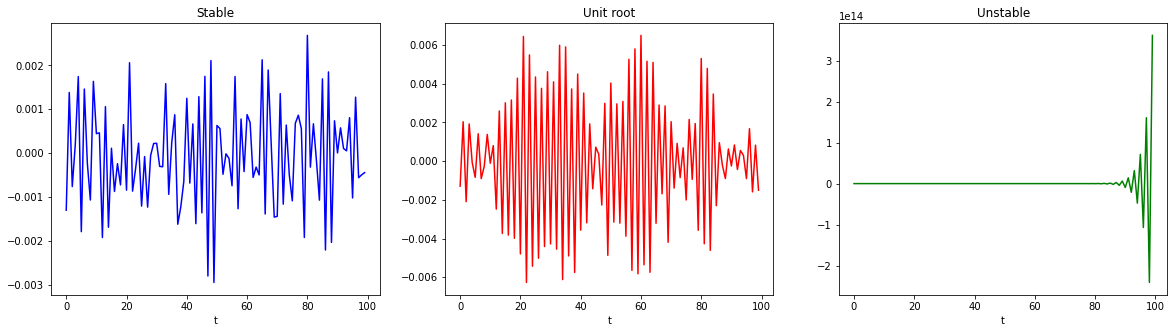

In [69]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))

colors = ['blue', 'red', 'green']
titles = ['Stable', 'Unit root', 'Unstable']

li =  [y2,y4,y6]
for i in range(len(li)):
    a = li[i]
    axs[i].plot(a, c=colors[i])
    axs[i].set(xlabel='t', title=titles[i])     

plt.show()

## AR(2)
$y_{t} = a_1 y_{t-1} + a_2 y_{t-2}$  

In [127]:
# characteristic equation: alpha^2 - a1*alpha - a2*alpha = 0; d = a1^2 + 4a2

# Case 1.1. d > 0; |r1|,|r2| < 0
# Example: y = 0.2yt-1 + 0.35yt-2

A11 = [0.2,0.35]
a,b,c = 1,-A11[0],-A11[1]
d = (b)**2 - 4*(a*c)
r1 = (-b + np.sqrt(d))/(2*a)
r2 = (-b - np.sqrt(d))/(2*a)
print('d and roots for Case 1.1:', d, r1, r2, sep=' ')

# Case 1.2. d > 0; |r1| or |r2| >= 0

A12 = [0.7,0.35]
a,b,c = 1,-A12[0],-A12[1]
d = (b)**2 - 4*(a*c)
r1 = (-b + np.sqrt(d))/(2*a)
r2 = (-b - np.sqrt(d))/(2*a)
print('d and roots for Case 1.2:', d, r1, r2, sep=' ')

# Case 2.1. d = 0; |a1| < 0; a2 = a1^2/4

A21 = [1.6,-0.6400000000000001]
a,b,c = 1,-A21[0],-A21[1]
d = (b)**2 - 4*(a*c)
r1 = (-b + np.sqrt(d))/(2*a)
r2 = (-b - np.sqrt(d))/(2*a)
print('d and roots for Case 2.1:', d, r1, r2, sep=' ')

# Case 2.2. d = 0; |a1| > 0; a2 = a1^2/4

A22 = [2.1,-1.1025]
a,b,c = 1,-A22[0],-A22[1]
d = (b)**2 - 4*(a*c)
r1 = (-b + np.sqrt(d))/(2*a)
r2 = (-b - np.sqrt(d))/(2*a)
print('d and roots for Case 2.2:', d, r1, r2, sep=' ')

# Case 3.1. d < 0; -a2 < 1

A31 = [1.6,-0.9]
a,b,c = 1,-A31[0],-A31[1]
d = (b)**2 - 4*(a*c)
r1 = (-b + np.sqrt(d))/(2*a)
r2 = (-b - np.sqrt(d))/(2*a)
print('d and roots for Case 3.1:', d, sep=' ')

# Case 3.2. d < 0; -a2 > 0

A32 = [1.6,-1.1]
a,b,c = 1,-A32[0],-A32[1]
d = (b)**2 - 4*(a*c)
r1 = (-b + np.sqrt(d))/(2*a)
r2 = (-b - np.sqrt(d))/(2*a)
print('d and roots for Case 3.2:', d, sep=' ')

d and roots for Case 1.1: 1.44 0.7 -0.5
d and roots for Case 1.2: 1.89 1.037386354243376 -0.33738635424337604
d and roots for Case 2.1: 0.0 0.8 0.8
d and roots for Case 2.2: 0.0 1.05 1.05
d and roots for Case 3.1: -1.0399999999999996
d and roots for Case 3.2: -1.8399999999999999


C:\Users\Alex\AppData\Local\Temp\ipykernel_8364\1035476895.py:45: RuntimeWarning: invalid value encountered in sqrt
  r1 = (-b + np.sqrt(d))/(2*a)
C:\Users\Alex\AppData\Local\Temp\ipykernel_8364\1035476895.py:46: RuntimeWarning: invalid value encountered in sqrt
  r2 = (-b - np.sqrt(d))/(2*a)
C:\Users\Alex\AppData\Local\Temp\ipykernel_8364\1035476895.py:54: RuntimeWarning: invalid value encountered in sqrt
  r1 = (-b + np.sqrt(d))/(2*a)
C:\Users\Alex\AppData\Local\Temp\ipykernel_8364\1035476895.py:55: RuntimeWarning: invalid value encountered in sqrt
  r2 = (-b - np.sqrt(d))/(2*a)


In [130]:
A = [A11,A12,A21,A22,A31,A32]
y = []
y2 =[]
for i in range(len(A)):
    mat = np.eye(T) + np.eye(T,k=-1)*-A[i][0] + np.eye(T,k=-2)*-A[i][1]
    a = np.linalg.inv(mat)@e
    a2 = np.linalg.inv(mat)@e2
    y.append(a)
    y2.append(a2)

### Examples visualized:
1.1: $y_{t} = 0.2 y_{t-1} + 0.35 y_{t-2}$; 2.1: $y_{t} = 0.7 y_{t-1} + 0.35 y_{t-2}$  
2.1: $y_{t} = 1.6 y_{t-1} - 0.64 y_{t-2}$; 2.2: $y_{t} = 2.1 y_{t-1} - 1.1025 y_{t-2}$  
3.1: $y_{t} = 1.6 y_{t-1} - 0.9 y_{t-2}$; 3.2: $y_{t} = 1.6 y_{t-1} - 1.1 y_{t-2}$  

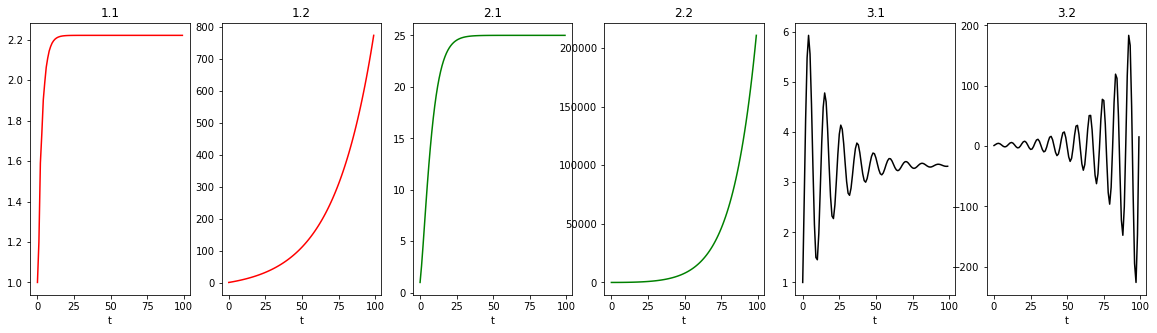

In [131]:
fig, axs = plt.subplots(1,6, figsize=(20, 5))

colors = ['red','red','green','green','black','black']
titles = ['1.1', '1.2', '2.1', '2.2','3.1','3.2']

for i in range(len(coef)):
    a = y[i]
    axs[i].plot(a, c = colors[i])
    axs[i].set(xlabel='t', title=titles[i])     

plt.show()

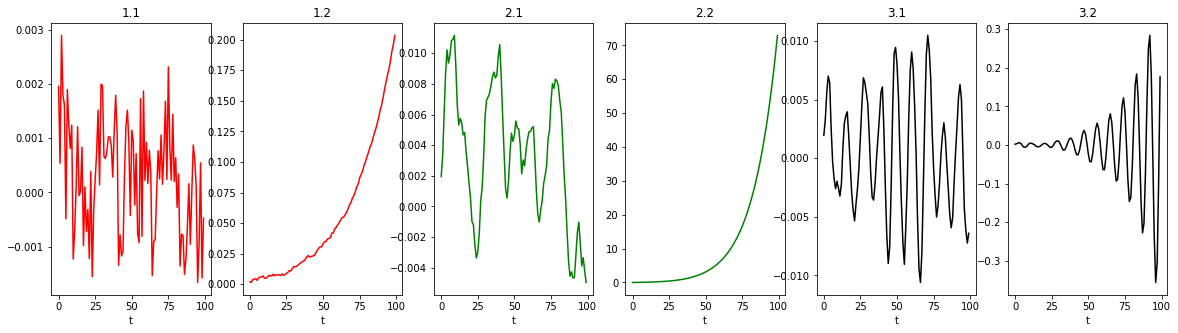

In [132]:
fig, axs = plt.subplots(1,6, figsize=(20, 5))

colors = ['red','red','green','green','black','black']
titles = ['1.1', '1.2', '2.1', '2.2','3.1','3.2']

for i in range(len(coef)):
    a = y2[i]
    axs[i].plot(a, c = colors[i])
    axs[i].set(xlabel='t', title=titles[i])     

plt.show()

### Stability conditions
1. Necessary condition for all the roots are inside the unit root: $\Sigma^n_{i=1} a_{i} < 1$
2. Sufficient condition for all the roots are inside the unit root: $\Sigma^n_{i=1} |a_{i}| < 1$
3. Unit root (at least one root equals unity): $\Sigma^n_{i=1} a_{i} = 1$

# Bivariate time series
## Some prerequisites from linear DE systems

![alt text](ФП.jpg "Title")

### VAR(1):
$$x_{t} = a_{11} x_{t-1} + a_{12} y_{t-1}$$ 
$$y_{t} = a_{21} x_{t-1} + a_{22} y_{t-1}$$  

In [83]:
T = 100
e1 = np.random.normal(0,0.1, size=(T,1))
e2 = np.random.normal(0,0.1, size=(T,1))

# Cases: stationary positive correlation, stat. neg., unit root, unit root + drift, unstab, pos., unstab. negba.

A1 = np.array([[0.7,0.2],[0.2,0.7]])
A2 = np.array([[0.5,-0.2],[-0.2,0.5]])
A3 = np.array([[0.5,0.5],[0.5,0.5]])
A5 = np.array([[0.9,0.3],[0.3,0.9]])
A6 = np.array([[0.9,-0.3],[-0.3,0.9]])

# Check the roots
print(np.linalg.eig(A1)[0])
print(np.linalg.eig(A2)[0])
print(np.linalg.eig(A3)[0])
print(np.linalg.eig(A5)[0])
print(np.linalg.eig(A6)[0])

[0.9 0.5]
[0.7 0.3]
[1.00000000e+00 1.11022302e-16]
[1.2 0.6]
[1.2 0.6]


In [76]:
# Stationary process 1 and 2: positive/negative correlation

y = []
z = []
y.append(1)
z.append(1)
y2 = []
z2 = []
y2.append(1)
z2.append(1)
a11,a22,a21,a12 = A1[0][0],A1[1][1],A1[1][0],A1[0][1]
b11,b22,b21,b12 = A2[0][0],A2[1][1],A2[1][0],A2[0][1]
for t in range(1,T):
    a = a11*y[t-1] + a12*z[t-1] + e1[t,0]
    b = a21*y[t-1] + a22*z[t-1] + e2[t,0]
    y.append(a)
    z.append(b)
    a = b11*y2[t-1] + b12*z2[t-1] + e1[t,0]
    b = b21*y2[t-1] + b22*z2[t-1] + e2[t,0]
    y2.append(a)
    z2.append(b)
TS1 = np.array([y,z,y2,z2])

# Unit root 1 and 2: with/without drift

y = []
z = []
y.append(1)
z.append(1)
y2 = []
z2 = []
y2.append(1)
z2.append(1)
a11,a22,a21,a12 = A3[0][0],A3[1][1],A3[1][0],A3[0][1]
for t in range(1,T):
    a = a11*y[t-1] + a12*z[t-1] + e1[t,0]
    b = a21*y[t-1] + a22*z[t-1] + e2[t,0]
    y.append(a)
    z.append(b)
    a = a11*y2[t-1] + a12*z2[t-1] + e1[t,0] + 0.5
    b = a21*y2[t-1] + a22*z2[t-1] + e2[t,0]
    y2.append(a)
    z2.append(b)
TS2 = np.array([y,z,y2,z2])

# Unstable process 1 and 2: positive/negative correlation

y = []
z = []
y.append(1)
z.append(1)
y2 = []
z2 = []
y2.append(1)
z2.append(1)
a11,a22,a21,a12 = A5[0][0],A5[1][1],A5[1][0],A5[0][1]
b11,b22,b21,b12 = A6[0][0],A6[1][1],A6[1][0],A6[0][1]
for t in range(1,T):
    a = a11*y[t-1] + a12*z[t-1] + e1[t,0]
    b = a21*y[t-1] + a22*z[t-1] + e2[t,0]
    y.append(a)
    z.append(b)
    a = b11*y2[t-1] + b12*z2[t-1] + e1[t,0]
    b = b21*y2[t-1] + b22*z2[t-1] + e2[t,0]
    y2.append(a)
    z2.append(b)
TS3 = np.array([y,z,y2,z2])

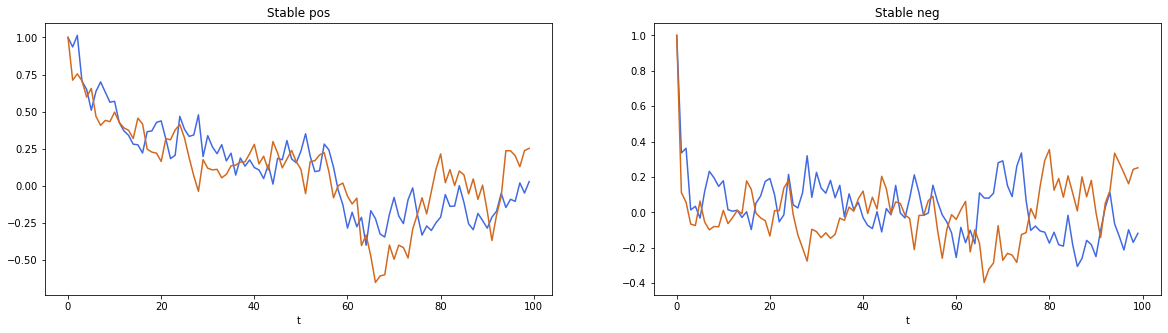

In [77]:
fig, axs = plt.subplots(1,2, figsize=(20, 5))

titles = ['Stable pos','Stable neg']

li = [TS1[0],TS1[2]]
li2 = [TS1[1],TS1[3]]
for i in range(len(li)):
    a = li[i]
    b = li2[i]
    axs[i].plot(a, c='royalblue')
    axs[i].plot(b, c='chocolate')
    axs[i].set(xlabel='t', title=titles[i])     
plt.show()

In [73]:
# Check the correlations

print(np.corrcoef(TS1[0],TS1[1]))
print(np.corrcoef(TS1[2],TS1[3]))

[[1.         0.79360483]
 [0.79360483 1.        ]]
[[ 1.         -0.03435677]
 [-0.03435677  1.        ]]


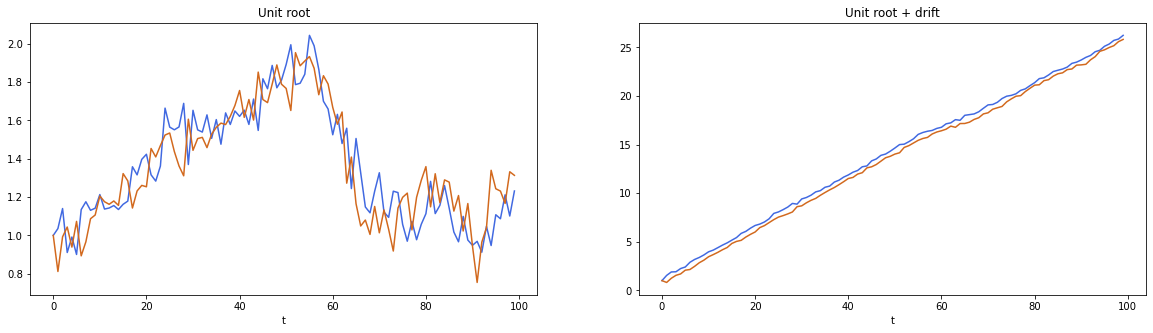

In [80]:
fig, axs = plt.subplots(1,2, figsize=(20, 5))

titles = ['Unit root','Unit root + drift']

li = [TS2[0],TS2[2]]
li2 = [TS2[1],TS2[3]]
for i in range(len(li)):
    a = li[i]
    b = li2[i]
    axs[i].plot(a, c='royalblue')
    axs[i].plot(b, c='chocolate')
    axs[i].set(xlabel='t', title=titles[i])     
plt.show()

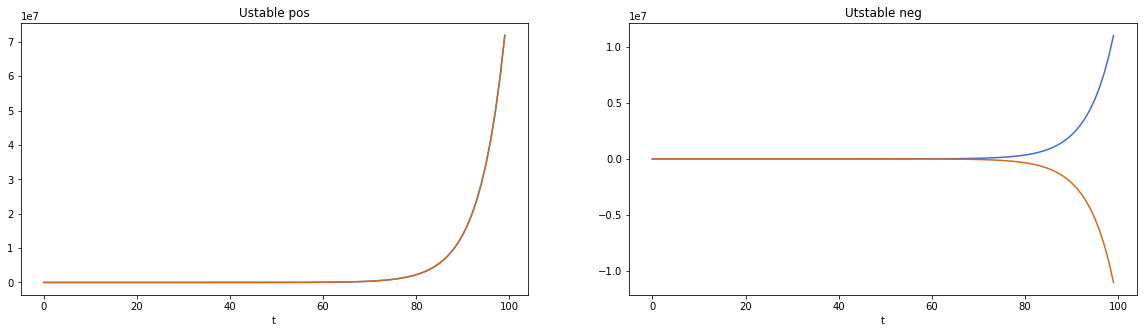

In [81]:
fig, axs = plt.subplots(1,2, figsize=(20, 5))

titles = ['Ustable pos','Utstable neg']

li = [TS3[0],TS3[2]]
li2 = [TS3[1],TS3[3]]
for i in range(len(li)):
    a = li[i]
    b = li2[i]
    axs[i].plot(a, c='royalblue')
    axs[i].plot(b, c='chocolate')
    axs[i].set(xlabel='t', title=titles[i])     
plt.show()